# Image Retrieval based on Microstructures Retrieval Phase

In [9]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import operator
from IPython.display import Image

## Establishing connection with the database

In [10]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017')
collection = client.test_database.coral2

## Querying for Image Vectors

Enter the input Image: 320


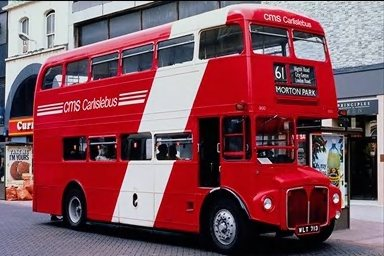

In [29]:
db = []
num = input('Enter the input Image: ')
for x in collection.find():
    db = np.array(x['distances'])
Image(str(num)+'.jpg')

## Calculating the distance

In [30]:
inputImage = db[num]

distance = np.zeros(1000*72).reshape(1000,72)

distance = abs(db - inputImage)

distanceSum = np.sum(distance,axis=1)

## Sorting the results

In [31]:
keys = np.arange(len(distanceSum),dtype=int)

Imagedictionary = dict(zip(keys, distanceSum))
sorted_images = sorted(Imagedictionary.items(), key=operator.itemgetter(1))

In [32]:
i = 0;
Resultimages = []
ResultHists = np.zeros(21*72).reshape(21,72)
for key in sorted_images:
    if(i<=20):
        ResultHists[i]=db[key[0]]
        i = i +1
        imageName = str(key[0])+'.jpg'
        Resultimages.append(imageName)
        print imageName
        Image(imageName)
    else:
        break;

320.jpg
310.jpg
336.jpg
352.jpg
377.jpg
317.jpg
322.jpg
100.jpg
370.jpg
804.jpg
302.jpg
340.jpg
308.jpg
381.jpg
334.jpg
300.jpg
345.jpg
127.jpg
855.jpg
571.jpg
332.jpg


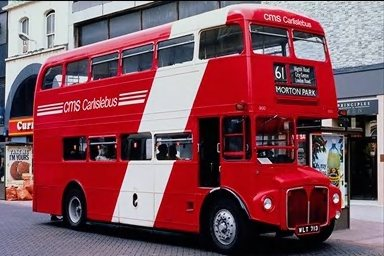

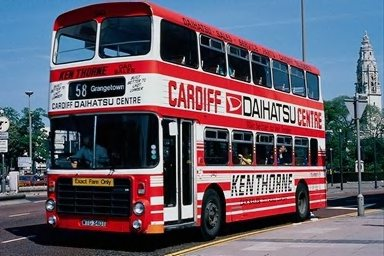

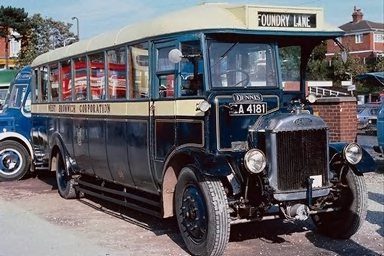

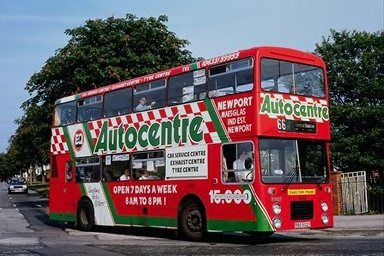

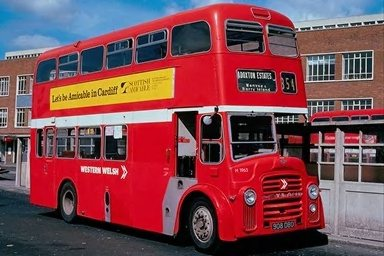

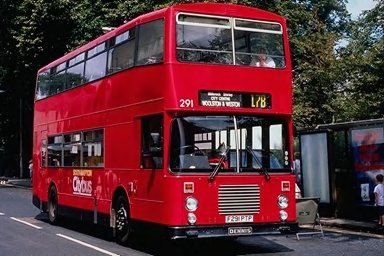

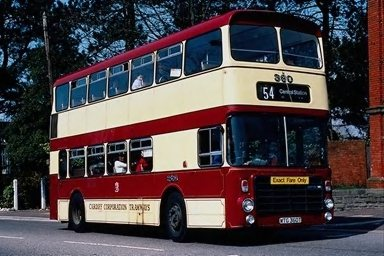

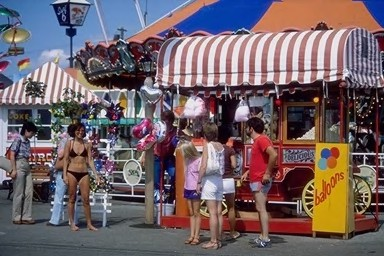

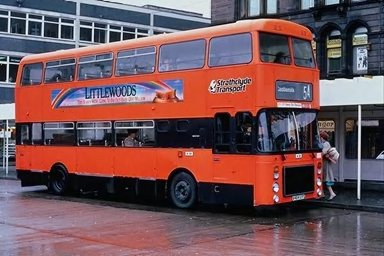

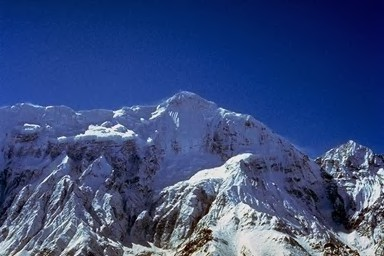

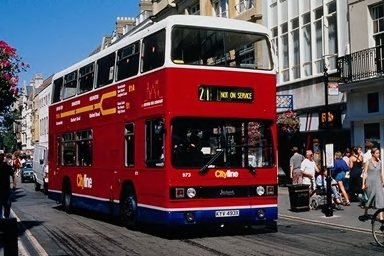

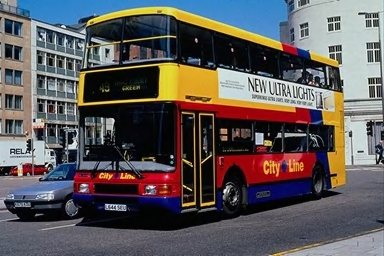

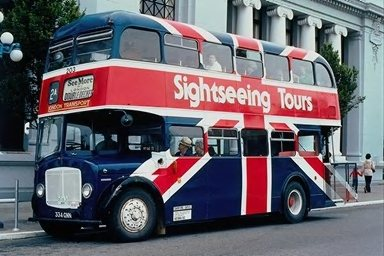

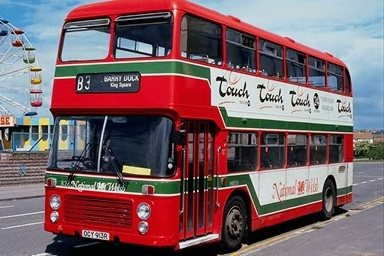

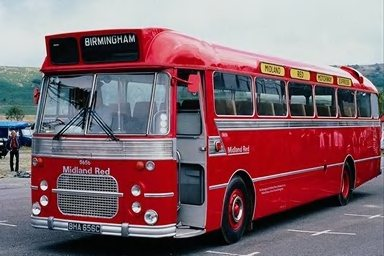

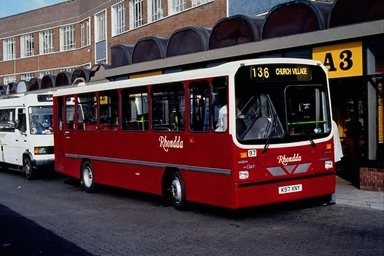

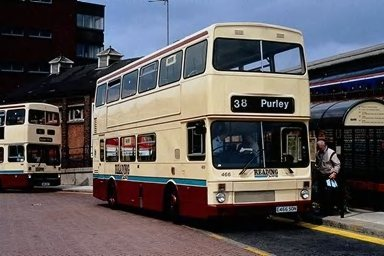

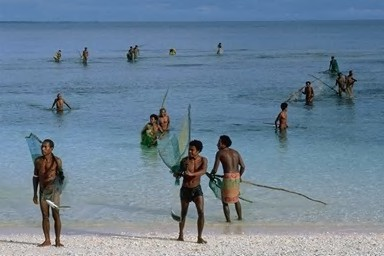

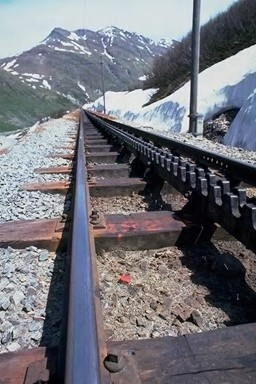

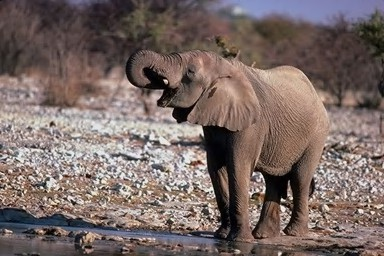

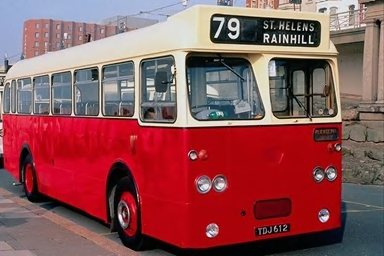

In [33]:
for ima in Resultimages:
    imageD = Image(ima)
    display(imageD)

In [ ]:
i=0
for hist in ResultHists:
    i=i+1
    plt.figure(i)
    plt.axis([0, 72, 0, 1])
    plt.bar(np.arange(72),hist)
    plt.xlabel('Bin size')
    plt.ylabel('Frequency')
    plt.title('Histogram of MSD of image')
    plt.grid(True)
plt.show()